<h1>Customer Analysis - Feature Engineering and Exploritory Data Analysis</h1>
<h2>Table of Contents</h2>
<p>add ToC here...</p>

<h2>Problem Statement</h2>
<p>
    Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
</p>
<p>
    Source: <a href="https://www.kaggle.com/imakash3011/customer-personality-analysis">Kaggle - Customer Personality Analysis</a></p>

<h2>Project Objectives</h2>
<ol>
    <li>Determine customer traits and behaviors</li>
    <li>Group similar customers based on traits and behaviors</li>
    <li>Create predictive model to predict which customers will respond to marketting campaigns</li>
</ol>
<h5>In this notebook I will focus on the 1st objective. I will read in the dataset and explain each feature.
    Then, I will fill missing values and perform feature engineering to create better features/reduce dimensionality.
    Finally, I will display patterns in the dataset and present my conclusions</h5>

<h2>Importing Libraries and Read In Dataset</h2>

In [1]:
#Import Libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.impute import SimpleImputer #impites missing vals
from datetime import datetime 

In [12]:
#Read In Dataset
pd.set_option('display.max_columns', None)
customer_data = pd.read_csv('marketing_campaign.csv',
                           delimiter='\t', index_col='ID')
customer_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<h3>About Each Attribute</h3>
<p><strong>People</strong></p>
<ul>
<li>ID: Customer's unique identifier</li>
<li>Year_Birth: Customer's birth year</li>
<li>Education: Customer's education level</li>
<li>Marital_Status: Customer's marital status</li>
<li>Income: Customer's yearly household income</li>
<li>Kidhome: Number of children in customer's household</li>
<li>Teenhome: Number of teenagers in customer's household</li>
<li>Dt_Customer: Date of customer's enrollment with the company</li>
<li>Recency: Number of days since customer's last purchase</li>
<li>Complain: 1 if customer complained in the last 2 years, 0 otherwise</li>
</ul>
<p><strong>Products</strong></p>
<ul>
<li>MntWines: Amount spent on wine in last 2 years</li>
<li>MntFruits: Amount spent on fruits in last 2 years</li>
<li>MntMeatProducts: Amount spent on meat in last 2 years</li>
<li>MntFishProducts: Amount spent on fish in last 2 years</li>
<li>MntSweetProducts: Amount spent on sweets in last 2 years</li>
<li>MntGoldProds: Amount spent on gold in last 2 years</li>
</ul>
<p><strong>Promotion</strong></p>
<ul>
<li>NumDealsPurchases: Number of purchases made with a discount</li>
<li>AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
<li>AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
<li>AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</li>
<li>AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise</li>
<li>AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise</li>
<li>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise</li>
</ul>
<p><strong>Place</strong></p>
<ul>
<li>NumWebPurchases: Number of purchases made through the company’s web site</li>
<li>NumCatalogPurchases: Number of purchases made using a catalogue</li>
<li>NumStorePurchases: Number of purchases made directly in stores</li>
<li>NumWebVisitsMonth: Number of visits to company’s web site in the last month</li>
</ul>
<p>
    Source: <a href="https://www.kaggle.com/imakash3011/customer-personality-analysis">Kaggle - Customer Personality Analysis</a></p>

<h2>Feature Engineering</h2>

In [13]:
#Feature Engineering
#Create 'Age' feature from customer's birth year
customer_data['Age'] = customer_data.Year_Birth.apply(lambda x: 2021 - int(x))

#Create 'Days_Since_Customer' feature from time the customer enrolled
customer_data['Dt_Customer'] = pd.to_datetime(customer_data.Dt_Customer)
now = datetime.now()
customer_data['Days_Since_Customer'] = customer_data.Dt_Customer.apply(lambda x: (now - x).total_seconds()/ (60 * 60 * 24))

#Create 'Fam_Size' feature from the marriage status, number of kids/teens
marital_map = {'Absurd': 1, 'Alone': 1, 'YOLO': 1, 'Single': 1,
              'Married': 2, 'Together': 2, 'Widow': 1, 'Divorced': 1}
customer_data['Marital_Status'] = customer_data.Marital_Status.map(marital_map) #Maps all singles as 1, couples as 2
customer_data['Num_Kids'] = customer_data.Kidhome.values + customer_data.Teenhome.values
customer_data['Fam_Size'] = customer_data.Marital_Status.values + customer_data.Num_Kids.values

#Create 'Num_Accepted' feature from the sum of previous marketting campaigns that were accepted by the customer
customer_data['Num_Accepted'] = customer_data.AcceptedCmp1.values + customer_data.AcceptedCmp2.values + \
                                customer_data.AcceptedCmp3.values + customer_data.AcceptedCmp4.values + \
                                customer_data.AcceptedCmp5.values

#Drops the unnecessary features from the original dataset
customer_data.drop(['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome',
                   'Z_CostContact', 'Z_Revenue', 'Num_Kids', 'Marital_Status'],
                   axis=1, inplace=True)
customer_data.head() 

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted
ID,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,64,3506.775445,1,0
2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,67,2660.775445,3,0
4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,56,3007.775445,2,0
6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,37,2600.775445,3,0
5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,40,2856.775445,3,0


<h2>Handle Missing Values</h2>

In [19]:
#Prints the size of the dataset
print('Dataset Shape:', customer_data.shape)
print('-------------------------------')
#Check if any columns contain null
print('Total Nulls Per Column:')
print(customer_data.isnull().sum())

Dataset Shape: (2240, 20)
-------------------------------
Total Nulls Per Column:
Education               0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
Age                     0
Days_Since_Customer     0
Fam_Size                0
Num_Accepted            0
dtype: int64


<h5>The 'Income' column contains 24 missing values. Since this only accounts for 1% of the total dataset, imputing the mean will not have great consequences.</h5>

In [20]:
#Imputes the mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(customer_data.Income.values.reshape(-1,1))
customer_data['Income'] = imputer.transform(customer_data.Income.values.reshape(-1,1))

In [52]:
#Writes new dataset csv
#Marketing Campaign Features Engineered CSV
customer_data.to_csv('mc_fe.csv')

<h2>Visualizing the Data</h2>

In [51]:
#Calculate percent of responses
pos_resp = customer_data.Response.sum()
total = customer_data.shape[0]
percent = round((pos_resp / total)*100, 2)

print(pos_resp, 'customers responded to the marketing campaign out of a total of', total, 'cutomers.')
print('Percent Responded: ' +  str(percent) + '%')

334 customers responded to the marketing campaign out of a total of 2240 cutomers.
Percent Responded: 14.91%


In [43]:
#View feature correlations with the 'Response' column
#Note: 'Response' will be the target for predictive modeling
response_corr_abs = np.abs(customer_data.corr()['Response']).sort_values(ascending=False)[1:]
response_corr = customer_data.corr()['Response'].sort_values(ascending=False)[1:]
print("Correlation Coefficients for 'Response'")
print('--------------------------------------------------------')
print(response_corr)

Correlation Coefficients for 'Response'
--------------------------------------------------------
Num_Accepted           0.426035
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
Days_Since_Customer    0.174061
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132756
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
Recency               -0.198437
Fam_Size              -0.219440
Name: Response, dtype: float64


In [44]:
#Creates function to display kde graphs
def display_kdeplot(df, col1, col2):
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=df, x=col1, hue=col2, multiple="stack")
    plt.title(col1 + ' correlation with ' + col2)
    plt.show()
    print(df[col1].describe())

<h5>Let us take a look at the top 5 most correlated features</h5>

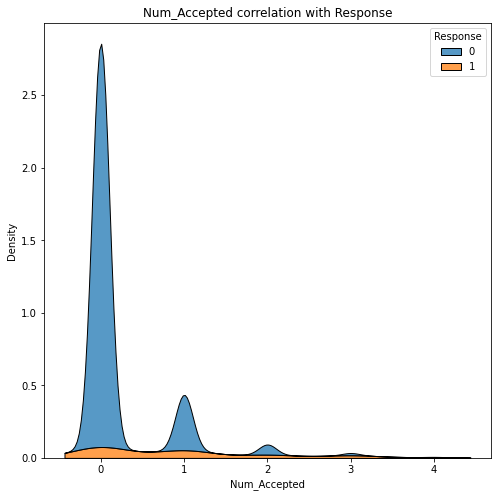

count    2240.000000
mean        0.297768
std         0.678381
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Num_Accepted, dtype: float64
Correlation %: 42.6
------------------------------------------------------------------------


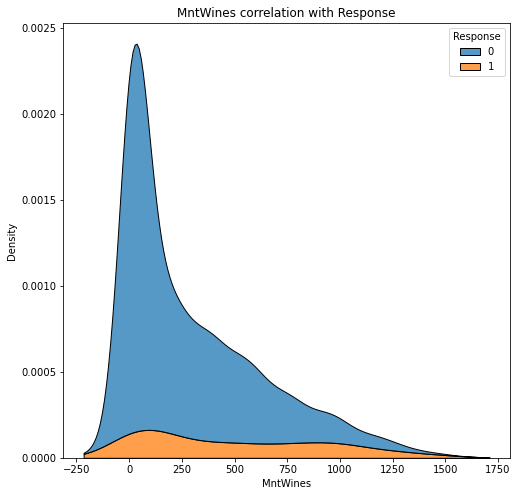

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64
Correlation %: 24.73
------------------------------------------------------------------------


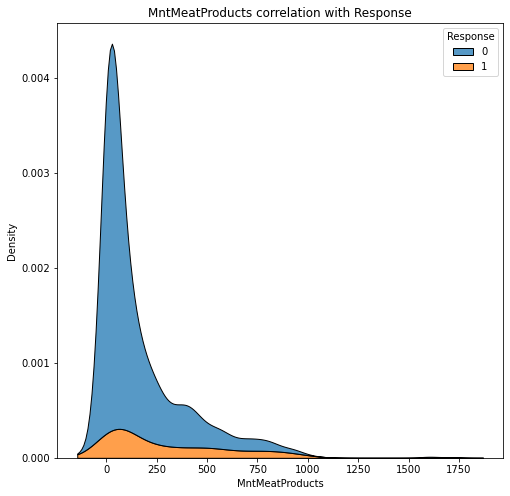

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64
Correlation %: 23.63
------------------------------------------------------------------------


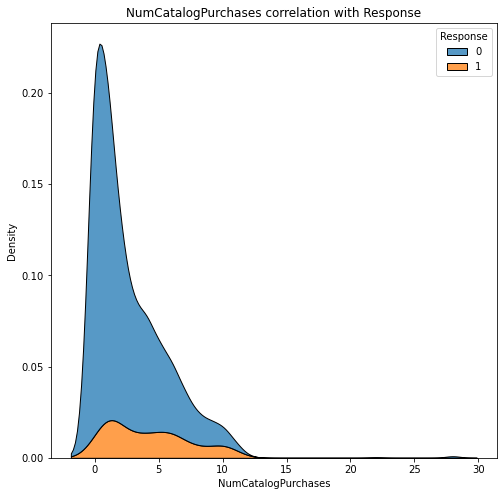

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64
Correlation %: 22.08
------------------------------------------------------------------------


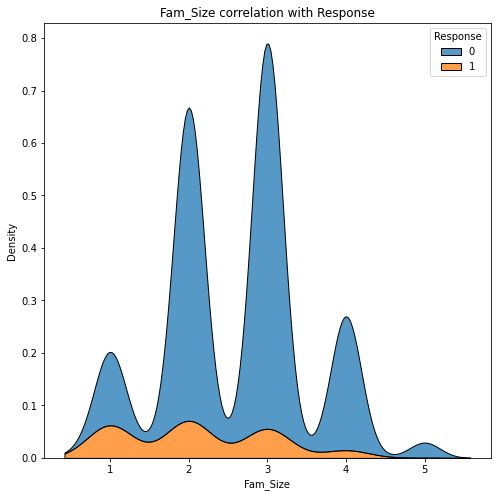

count    2240.000000
mean        2.595089
std         0.906959
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Fam_Size, dtype: float64
Correlation %: -21.94
------------------------------------------------------------------------


In [46]:
for i in range(5):
    feature_name = response_corr_abs.index[i]
    display_kdeplot(customer_data, feature_name, 'Response')
    print('Correlation %:', round(response_corr[feature_name] * 100, 2))
    print('------------------------------------------------------------------------')

<h2>Conclusions</h2>
<ul>
    <li><strong>Positive response to previous marketing campaigns</strong> was the most correlated with a response to 
        the most recent ad campaign. This shows that possibly the customers are very happy with the marketing campaigns
        and decide to respond to the next campaign. Or this could be showing a certain group of customers that are more
        influenced by the campaigns.</li>
    <li><strong>Amount spent on wines and meats</strong> are very highly correlated with whether the customer responded to
        the marketing campaign. However, amount spent on gold, fish, sweets and fish were not as correlated.
        This could be due to the nature of the most recent marketing campaign - perhaps the store was trying to
        sell meat and wine?</li>
    <li><strong>Catalog purchases correlate with response</strong> to the current marketing campaign where as in store, 
        online, and deal purchases have very little to no correlation. This may be due to the medium that the marketing 
        campaign was using - maybe it was not displayed in store/online but was in all the catalogs? Another possibility
        is that those customers who perform catalog purchases are more influenced by the campaigns</li>
    <li><strong>Customers with smaller family size responded better</strong> to the marketing campaign. Maybe the customers
        without family had more money to spend on the products in the campaign or the products in the campaign were for 
        signle customers (like alcohol and party supplies). Without further inforamation on the details on the campaign
        it is hard to say.</li>
    <li><strong>Customers who recently purchased something are likely to respond</strong> to the marketing campaign. 
        This is pretty clear - more recent purchases = probable pattern of shopping at the store</li>
    <li>Finally, of note is <strong>Age and Complaining had virtually 0 correlation</strong> with response. This shows
        that the campaign did a good job of catering to all age groups and that customers who complained in the past
        continued bussiness at the store</li>
</ul>

<h5>Next, I will be performing customer segmentation in the '2.Customer_Segmentation' notebook</h5>